# Imports

In [130]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

# Loading data

In [131]:
def import_data():
    # Connecting to MySQL
    palworld_database = mysql.connector.connect(
        host="localhost",
        user="root",
        password="root",
        database="palworld_database"  # Make sure the database name is correct
    )
    cursor = palworld_database.cursor()

    # Importing the dataset
    cursor.execute("SELECT volume_size, genus_category, rarity, element_1, element_2 FROM pals")  
    volume_dataset = cursor.fetchall()

    # Closing the connection
    cursor.close()
    palworld_database.close()

    return volume_dataset

# About volume size of Pals 

## Percentage distribution of number of Pals by volume size :

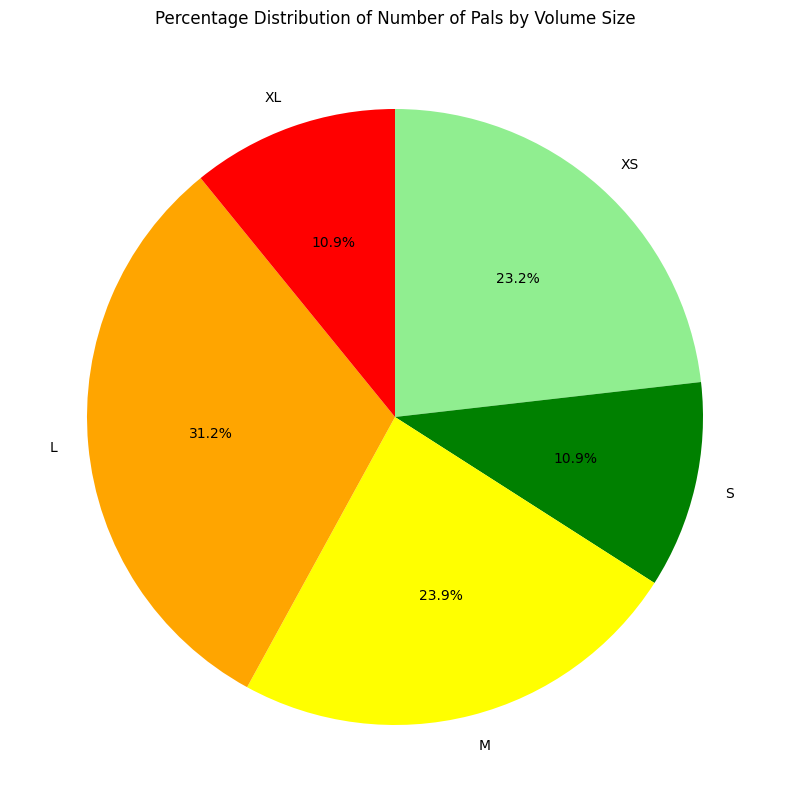

In [132]:
# Function to plot the distribution of number of pals by volume size and genus category
def volume_size_distribution_pie():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting volume_size from the dataset
    volume_size = [row[0] for row in volume_dataset]  # row[0] because we only have one column

    # Creating a dictionary to count the frequency of each volume size
    volume_size_freq = {}
    for size in volume_size:
        if size in volume_size_freq:
            volume_size_freq[size] += 1
        else:
            volume_size_freq[size] = 1

    # Defining color gradient
    colors = {'XS': 'lightgreen', 'S': 'green', 'M': 'yellow', 'L': 'orange', 'XL': 'red'}

    # Ordering the sizes in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    volume_size_freq = {size: volume_size_freq.get(size, 0) for size in sizes_order}  # Use get() to avoid KeyError
    
    # Creating a larger figure
    plt.figure(figsize=(10, 10))
    
    # Plotting the pie chart
    plt.pie(volume_size_freq.values(), labels=volume_size_freq.keys(), autopct='%1.1f%%', startangle=90, colors=[colors[size] for size in volume_size_freq.keys()], counterclock=False)
    plt.title('Percentage Distribution of Number of Pals by Volume Size')
    plt.show()

# Calling the functions
volume_size_distribution_pie()

### Report :
The distribution of Pals by volume size varies considerably. 

* The **L** category is the most represented with **31.2%** of Pals, indicating that the majority of Pals have a relatively large volume size. 

    * This could be due to a number of factors, such as players’ preference for larger-sized Pals or the increased availability of these Pals in the game.

* The **XS** and **M** categories follow closely, with **23.2%** and **23.9%** of Pals respectively. 
    * This suggests that a significant proportion of Pals also have smaller or medium volume sizes. 
        * It would be interesting to examine in more detail why these sizes are also popular. For example, **XS** and **M** sized Pals might have specific capabilities or attributes that make them attractive to players.

* Finally, the **S** and **XL** categories are the least represented, each with **10.9%** of Pals. 
    * This could indicate that these volume sizes are less common or less preferred by players. 
        * It might be useful to investigate further the reasons for this distribution.

*Overall, these statistics provide an interesting overview of the distribution of volume sizes among Pals. However, for a more comprehensive analysis, it would be useful to have additional data, such as the specific attributes of Pals in each size category, player preferences, and how these factors might influence the observed distribution.*






## Distribution of number of Pals by volume size and genus category :

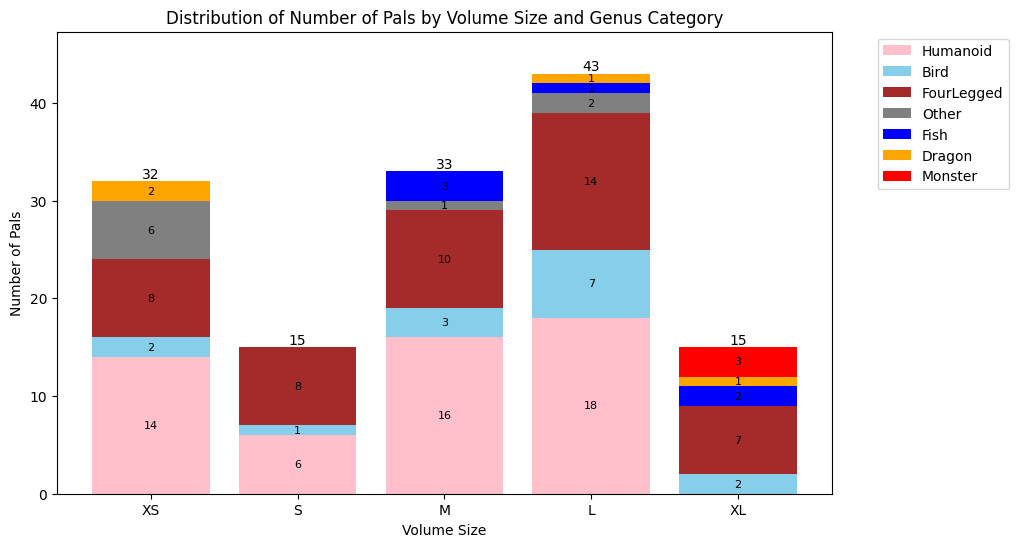

In [133]:
# Function to plot the distribution of number of pals by volume size and genus category
def volume_size_distribution_genus_bar():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting volume_size and genus_category from the dataset
    volume_size = [row[0] for row in volume_dataset]  # row[0] because we only have one column
    genus_category = [row[1] for row in volume_dataset]  # assuming genus_category is in row[1]

    # Creating a dictionary to count the frequency of each volume size for each genus category
    volume_size_freq = {}
    for i in range(len(volume_size)):
        size = volume_size[i]
        category = genus_category[i]
        if size not in volume_size_freq:
            volume_size_freq[size] = {}
        if category in volume_size_freq[size]:
            volume_size_freq[size][category] += 1
        else:
            volume_size_freq[size][category] = 1

    # Defining color gradient for genus category
    colors = {'Humanoid': 'pink', 'Bird': 'skyblue', 'FourLegged': 'brown', 'Other': 'gray', 'Fish': 'blue', 'Dragon': 'orange', 'Monster': 'red'}

    # Ordering the sizes and categories in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(sizes_order))
    for category in categories_order:
        values = [volume_size_freq[size].get(category, 0) for size in sizes_order]
        bars = ax.bar(sizes_order, values, bottom=bottom, color=colors[category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(sizes_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Volume Size')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Volume Size and Genus Category')
    ax.legend(categories_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the functions
volume_size_distribution_genus_bar()

### Report :

| **VOLUME SIZE** | **TOTAL NUMBER OF PALS BY VOLUME SIZE** | **DRAGON**              | **OTHER**               | **FOURLEGGED**           | **BIRD**                | **HUMANOID**             | **MONSTER**          | **FISH**                | 
|-----------------|--------------------------|-------------------------|-------------------------|--------------------------|-------------------------|--------------------------|----------------------|-------------------------|
| **XS**          | 32                       |  2 PALS, WHICH IS **6.25%** | 6 PALS, WHICH IS **18.75%** | 8 PALS, WHICH IS **25%**     | 2 PALS, WHICH IS **6.25%**  | 14 PALS, WHICH IS **43.75%** | -                    | -                       |      
| **S**           | 15                       | -                       | -                       | 8 PALS, WHICH IS **53.33%**  | 1 PAL, WHICH IS **6.67%**   | 6 PALS, WHICH IS **40%**     | -                    | -                       |      
| **M**           | 33                       | -                       | 1 PAL, WHICH IS **3.03%**   | 10 PALS, WHICH IS **30.3%**  | 3 PALS, WHICH IS **9.09%**  | 16 PALS, WHICH IS **48.48%** | -                    | 3 PALS, WHICH IS **9.09%**  |      
| **L**           | 43                       | 1 PAL, WHICH IS **2.33%**   | 2 PALS, WHICH IS **4.65%**  | 14 PALS, WHICH IS **32.56%** | 7 PALS, WHICH IS **16.28%** | 18 PALS, WHICH IS **41.86%** | -                    | 1 PAL, WHICH IS **2.33%**   |      
| **XL**          | 15                       | 1 PAL, WHICH IS **6.67%**   | -                       | 7 PALS, WHICH IS **46.67%**  | 2 PALS, WHICH IS **13.33%** | -                        | 3 PALS, WHICH IS **20%** | 2 PALS, WHICH IS **13.33%** |      
   

* **XS**: This size is dominated by Humanoid Pals, which make up 43.75% of this category. FourLegged and Other Pals are also well represented with 25% and 18.75% respectively. 
   * This could indicate that players prefer small-sized Pals with humanoid or various features.
* **S**: FourLegged Pals dominate this category with 53.33%, followed by Humanoid Pals at 40%. 
   * This could suggest that for slightly larger Pals, players prefer animal-like features.
* **M**: Humanoid Pals are the most numerous with 48.48%, followed by FourLegged Pals at 30.3%. 
   * This could indicate a preference for medium-sized Pals with humanoid features, but also an appreciation for animal-like features.
* **L**: Humanoid Pals are the most represented with 41.86%, closely followed by FourLegged Pals at 32.56%. 
   * This could indicate a preference for large-sized Pals with humanoid features, but also an appreciation for animal-like features.
* **XL**: This category is dominated by FourLegged Pals at 46.67%, followed by Monster Pals at 20%. 
   * This could suggest that for very large Pals, players prefer more monstrous or animal-like features.

*In summary, it seems that Humanoid Pals are generally preferred in all sizes, except for XL size where FourLegged and Monster Pals are more common. This could indicate that players prefer Pals that resemble humans for smaller sizes, while for larger sizes, they prefer Pals with more animal-like or monstrous features. It would be interesting to explore in more detail the reasons for these preferences.*


## Distribution of number of Pals by volume size and rarity category :

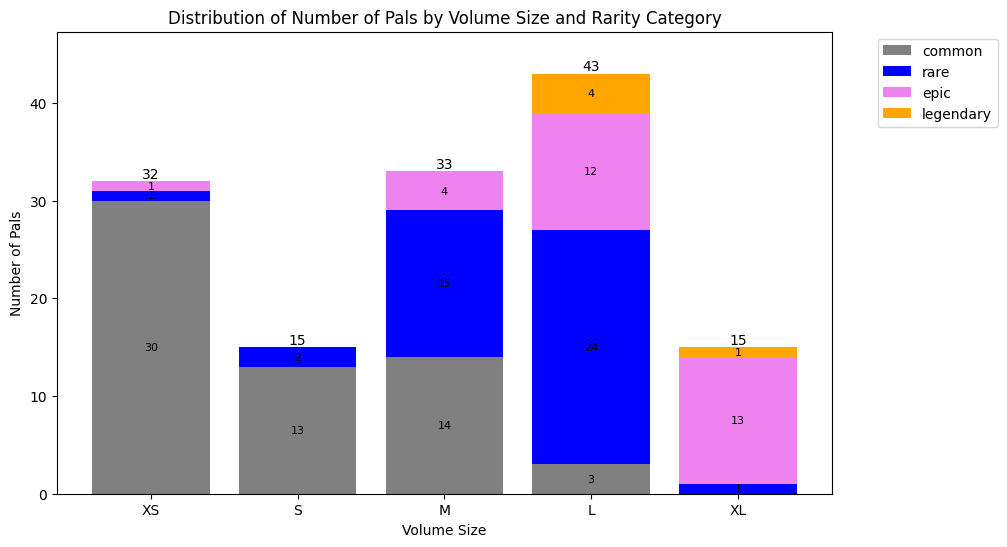

In [134]:
# Function to plot the distribution of number of pals by volume size and rarity category (1 to 4 = common, 5 to 7 = rare, 8 to 10 = epic and 10+ = legendary)
def volume_size_distribution_rarity_bar():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting volume_size and rarity from the dataset
    volume_size = [row[0] for row in volume_dataset]  # row[0] because we only have one column
    rarity = [row[2] for row in volume_dataset]  # assuming rarity is in row[2]

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in rarity:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Creating a dictionary to count the frequency of each volume size for each rarity category
    volume_size_freq = {}
    for i in range(len(volume_size)):
        size = volume_size[i]
        category = rarity_categories[i]
        if size not in volume_size_freq:
            volume_size_freq[size] = {}
        if category in volume_size_freq[size]:
            volume_size_freq[size][category] += 1
        else:
            volume_size_freq[size][category] = 1

    # Defining color gradient for rarity category
    colors = {'common': 'gray', 'rare': 'blue', 'epic': 'violet', 'legendary': 'orange'}

    # Ordering the sizes and categories in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    categories_order = ['common', 'rare', 'epic', 'legendary']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(sizes_order))
    for category in categories_order:
        values = [volume_size_freq[size].get(category, 0) for size in sizes_order]
        bars = ax.bar(sizes_order, values, bottom=bottom, color=colors[category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(sizes_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Volume Size')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Volume Size and Rarity Category')
    ax.legend(categories_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the functions
volume_size_distribution_rarity_bar()

### Report :

| **VOLUME SIZE** | **TOTAL NUMBER OF PALS** | **COMMON (1 to 4)**       | **RARE (5 to 7)**        | **EPIC (8 to 10)**       | **LEGENDARY (10+)**    | 
|-----------------|--------------------------|---------------------------|--------------------------|------|------|
| **XS**          | 32                       | 30 PALS, WHICH IS 93.75%  | 1 PALS, WHICH IS 3.125%  | 1 PALS, WHICH IS 3.125%  | -                      |      |      |      |      |
| **S**           | 15                       | 13 PALS, WHICH IS 86.67%  | 2 PALS, WHICH IS 13.33%  | -                        | -                      |      |      |      |      |
| **M**           | 33                       | 14 PALS, WHICH IS 42.42%  | 15 PALS, WHICH IS 45.45% | 4 PALS, WHICH IS 12.12%  | -                      |      |      |      |      |
| **L**           | 43                       | 3 PALS, WHICH IS 6.98%    | 24 PALS, WHICH IS 55.81% | 12 PALS, WHICH IS 27.91% | 4 PALS, WHICH IS 9.30% |      |      |      |      |
| **XL**          | 15                       | -                         | 1 PALS, WHICH IS 6.67%   | 13 PALS, WHICH IS 86.67% | 1 PALS, WHICH IS 6.67% |      |      |      |      |


* **XS**: Out of 32 Pals, the majority are common (93.75%), with one epic Pal (3.125%) and one rare Pal (3.125%).
    * This could indicate that small-sized Pals are generally common, with a few rare and epic exceptions.
* **S**: Out of 15 Pals, the majority are common (86.67%), with two rare Pals (13.33%).
    * This could suggest that slightly larger Pals are mainly common, but with a notable presence of rare Pals.
* **M**: Out of 33 Pals, the distribution is more balanced with 45.45% rare Pals, 42.42% common Pals, and 12.12% epic Pals.
    * This could indicate a diversity of rarity for medium-sized Pals.
* **L**: Out of 43 Pals, the majority are rare (55.81%), followed by epic Pals (27.91%) and legendary Pals (9.30%). Only 3 Pals are common (6.98%).
    * This could indicate a preference for large-sized Pals with rare, epic, or legendary features.
* **XL**: Out of 15 Pals, the majority are epic (86.67%), with one legendary Pal (6.67%) and one rare Pal (6.67%).
    * This could suggest that for very large Pals, players prefer epic features, with a few rare and legendary exceptions.

*In summary, it seems that common Pals are generally preferred for smaller sizes, while for larger sizes, rare, epic, and legendary Pals are more common. This could indicate that players prefer more common Pals for smaller sizes, while for larger sizes, they prefer Pals with rarer or epic features. It would be interesting to explore in more detail the reasons for these preferences.*

## Summary of the analysis of Pals distribution by volume size : 

* **Volume Size Distribution** : The majority of Pals fall into the Large (L) category, making up 31.2% of the total. The Extra Small (XS) and Medium (M) categories follow closely, each representing around 23% of the total. The Small (S) and Extra Large (XL) categories are the least represented, each making up 10.9% of the total.
* **Genus Category** : Humanoid Pals are generally preferred across all sizes, except for the XL size where FourLegged and Monster Pals are more common. This suggests that players prefer Pals that resemble humans for smaller sizes, while for larger sizes, they prefer Pals with more animal-like or monstrous features.
* **Rarity Category** : Common Pals are generally preferred for smaller sizes (XS and S), while for larger sizes (M, L, and XL), rare, epic, and legendary Pals are more common. This could indicate that players prefer more common Pals for smaller sizes, while for larger sizes, they prefer Pals with rarer or epic features.

**In conclusion** : the analysis shows that players’ preferences for Pals vary significantly depending on the volume size, genus, and rarity categories. Further research could explore the reasons behind these preferences, such as specific capabilities or attributes of Pals in each category, and how these factors might influence the observed distribution.





# About Pals genus categories 

## Percentage distribution of number of Pals by genus category :

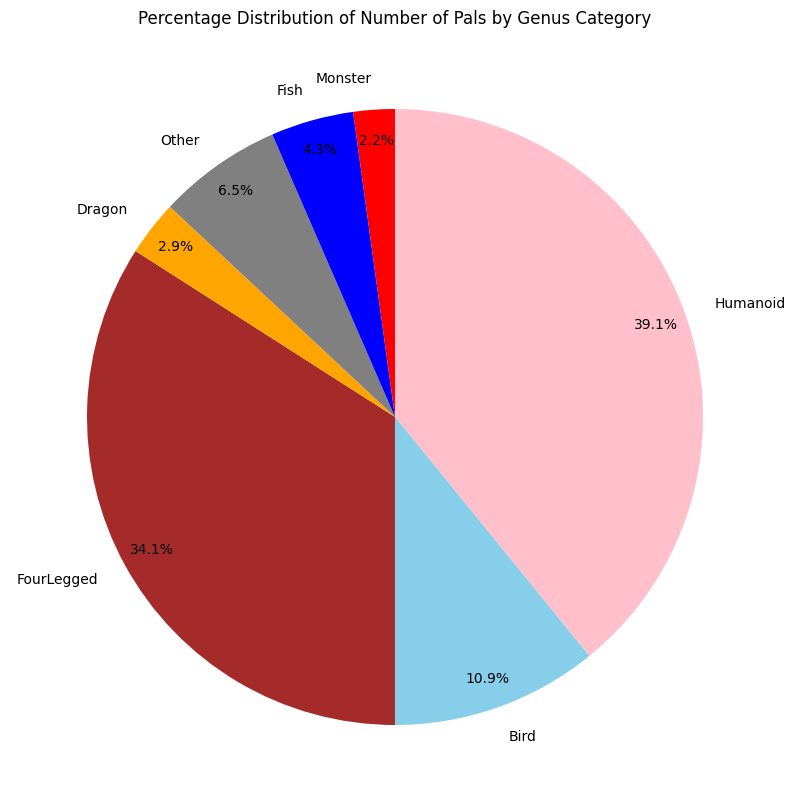

In [135]:
# Function to plot the distribution of pals genius category
def genus_category_distribution_pie():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting genus_category from the dataset
    genus_category = [row[1] for row in volume_dataset]  # assuming genus_category is in row[1]

    # Creating a dictionary to count the frequency of each genus category
    genus_category_freq = {}
    for category in genus_category:
        if category in genus_category_freq:
            genus_category_freq[category] += 1
        else:
            genus_category_freq[category] = 1

    # Defining color gradient
    colors = {'Humanoid': 'pink', 'Bird': 'skyblue', 'FourLegged': 'brown', 'Other': 'gray', 'Fish': 'blue', 'Dragon': 'orange', 'Monster': 'red'}
    
    # Creating a larger figure
    plt.figure(figsize=(10, 10))
    
    # Plotting the pie chart
    plt.pie(genus_category_freq.values(), labels=genus_category_freq.keys(), autopct='%1.1f%%', pctdistance=0.9, startangle=90, colors=[colors[category] for category in genus_category_freq.keys()], counterclock=False)
    plt.title('Percentage Distribution of Number of Pals by Genus Category')
 
    plt.show()

# Calling the functions
genus_category_distribution_pie()

### Report : 
! TO DO !

## ! add title ! 

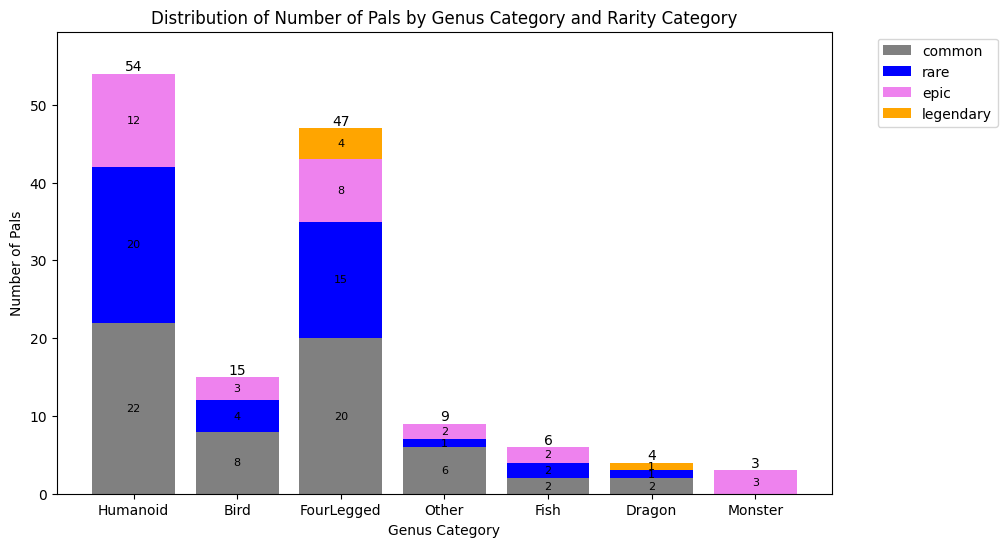

In [136]:
# Function to plot the distribution of pals genius category by if theyr are common, rare, epic or legendary
def genus_category_distribution_rarity_bar():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting genus_category and rarity from the dataset
    genus_category = [row[1] for row in volume_dataset]  # assuming genus_category is in row[1]
    rarity = [row[2] for row in volume_dataset]  # assuming rarity is in row[2]

    # Convert rarity numbers to categories
    rarity_categories = []
    for r in rarity:
        if 1 <= r <= 4:
            rarity_categories.append('common')
        elif 5 <= r <= 7:
            rarity_categories.append('rare')
        elif 8 <= r <= 10:
            rarity_categories.append('epic')
        else:  # r > 10
            rarity_categories.append('legendary')

    # Creating a dictionary to count the frequency of each genus category for each rarity category
    genus_category_freq = {}
    for i in range(len(genus_category)):
        category = genus_category[i]
        rarity_category = rarity_categories[i]
        if category not in genus_category_freq:
            genus_category_freq[category] = {}
        if rarity_category in genus_category_freq[category]:
            genus_category_freq[category][rarity_category] += 1
        else:
            genus_category_freq[category][rarity_category] = 1

    # Defining color gradient for rarity category
    colors = {'common': 'gray', 'rare': 'blue', 'epic': 'violet', 'legendary': 'orange'}

    # Ordering the categories and rarity categories in the desired order
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']
    rarity_order = ['common', 'rare', 'epic', 'legendary']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(categories_order))
    for rarity_category in rarity_order:
        values = [genus_category_freq[category].get(rarity_category, 0) for category in categories_order]
        bars = ax.bar(categories_order, values, bottom=bottom, color=colors[rarity_category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(categories_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Genus Category')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Genus Category and Rarity Category')
    ax.legend(rarity_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the functions
genus_category_distribution_rarity_bar()

### Report : 
! TO DO !

## ! add title ! 

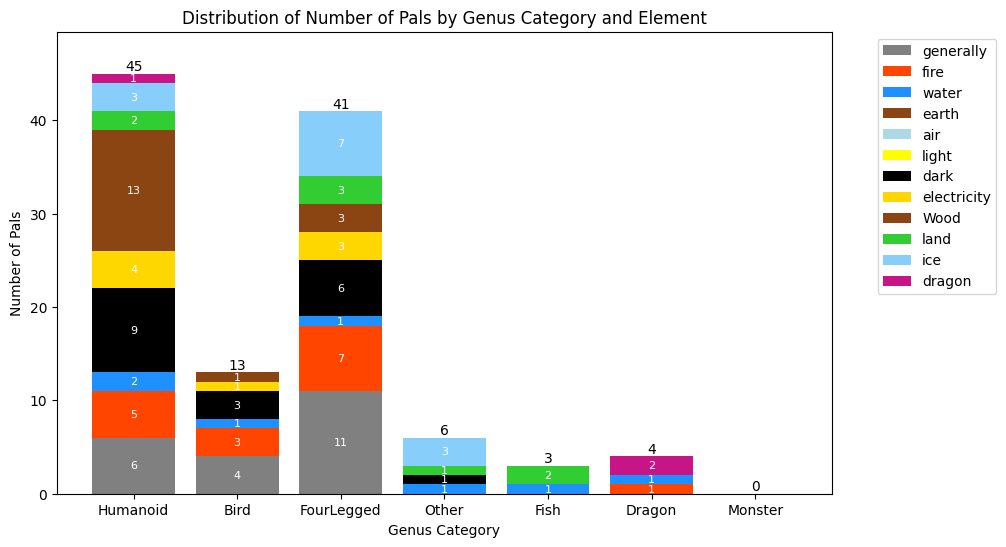

In [138]:
# Function to plot the distribution of pals genius category by element
def genus_category_distribution_single_element_bar():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting genus_category, element_1 and element_2 from the dataset
    genus_category = [row[1] for row in volume_dataset]  # assuming genus_category is in row[1]
    element_1 = [row[3] for row in volume_dataset]  # assuming element_1 is in row[3]
    element_2 = [row[4] for row in volume_dataset]  # assuming element_2 is in row[4]

    # Creating a dictionary to count the frequency of each genus category for each element
    genus_category_freq = {}
    for i in range(len(genus_category)):
        category = genus_category[i]
        if element_2[i] is None:  # Only consider pals with a single element
            element = element_1[i]
            if category not in genus_category_freq:
                genus_category_freq[category] = {}
            if element in genus_category_freq[category]:
                genus_category_freq[category][element] += 1
            else:
                genus_category_freq[category][element] = 1
                
    # Defining color gradient for elements
    colors = {'generally': 'gray', 'fire': '#ff4500', 'water': '#1e90ff', 'earth': '#8b4513', 'air': 'lightblue', 'light': 'yellow', 'dark': 'black', 'electricity': '#ffd700', 'Wood': '#8B4513', 'land': '#32CD32', 'ice': '#87CEFA', 'dragon': '#C71585'}
    # Ordering the categories and elements in the desired order
    elements_order = ['generally', 'fire', 'water', 'earth', 'air', 'light', 'dark', 'electricity', 'Wood', 'land', 'ice', 'dragon']
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']
    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(categories_order))
    for element in elements_order:
        values = [genus_category_freq[category].get(element, 0) if category in genus_category_freq else 0 for category in categories_order]
        bars = ax.bar(categories_order, values, bottom=bottom, color=colors[element])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='white', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(categories_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Genus Category')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Genus Category and Element')
    ax.legend(elements_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the function
genus_category_distribution_single_element_bar()

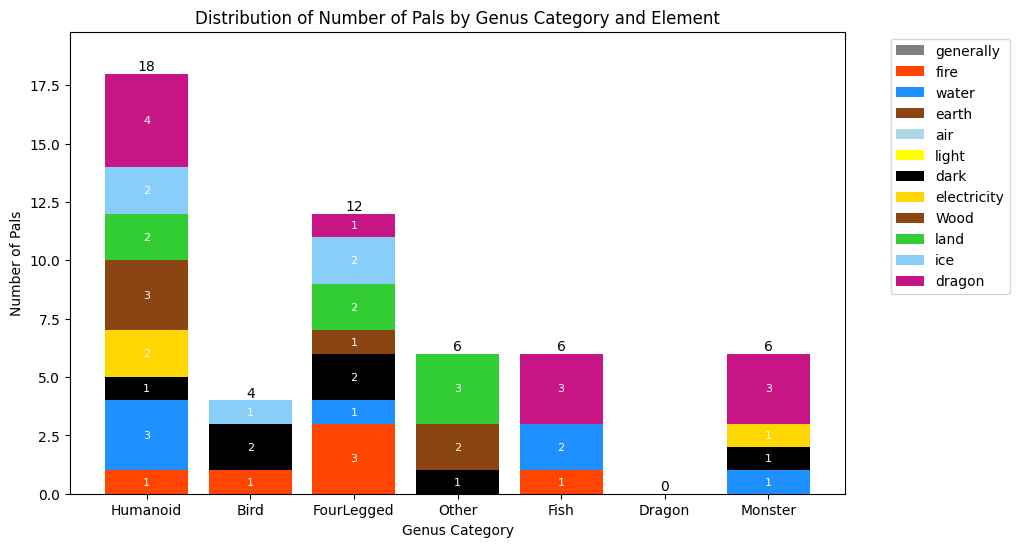

In [145]:
# Function to plot the distribution of pals genius category by element
def genus_category_distribution_double_element_bar():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting genus_category, element_1 and element_2 from the dataset
    genus_category = [row[1] for row in volume_dataset]  # assuming genus_category is in row[1]
    element_1 = [row[3] for row in volume_dataset]  # assuming element_1 is in row[3]
    element_2 = [row[4] for row in volume_dataset]  # assuming element_2 is in row[4]

    # Creating a dictionary to count the frequency of each genus category for each element
    genus_category_freq = {}
    for i in range(len(genus_category)):
        category = genus_category[i]
        if element_2[i] is not None:  # Only consider pals with two elements
            elements = [element_1[i], element_2[i]]
            if category not in genus_category_freq:
                genus_category_freq[category] = {}
            for element in elements:
                if element in genus_category_freq[category]:
                    genus_category_freq[category][element] += 1
                else:
                    genus_category_freq[category][element] = 1
                
    # Defining color gradient for elements
    colors = {'generally': 'gray', 'fire': '#ff4500', 'water': '#1e90ff', 'earth': '#8b4513', 'air': 'lightblue', 'light': 'yellow', 'dark': 'black', 'electricity': '#ffd700', 'Wood': '#8B4513', 'land': '#32CD32', 'ice': '#87CEFA', 'dragon': '#C71585'}
    # Ordering the categories and elements in the desired order
    elements_order = ['generally', 'fire', 'water', 'earth', 'air', 'light', 'dark', 'electricity', 'Wood', 'land', 'ice', 'dragon']
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']
    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(categories_order))
    for element in elements_order:
        values = [genus_category_freq[category].get(element, 0) if category in genus_category_freq else 0 for category in categories_order]
        bars = ax.bar(categories_order, values, bottom=bottom, color=colors[element])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='white', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(categories_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Genus Category')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Genus Category and Element')
    ax.legend(elements_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Calling the function
genus_category_distribution_double_element_bar()